# Citim datele

In [1]:
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(pd.__version__) #print pandas version, e.g., 0.24.2
#to upgrade: pip install --upgrade pandas

def load_data():
    xlsx_path = "output.xlsx"
    return pd.read_excel(xlsx_path)

In [2]:
announces = load_data()
announces.head()

,Nr. camere:,Suprafață utilă,Nr. băi:,Nr. balcoane:,Etaj:,Locuri de parcare:,Boxă la subsol:,Tip compartimentare:,Vechime apartament:,Tip imobil:,Dotări:,Anul construcției:,Tip finisaj:,Materiale construcție:,Modalitate vânzare:,Facilități:,Data anunt,Cartier,Pret/mp
0,3,76.0,1,2.0,4,3.0,Nu,Semidecomandat,Nou,Bloc de apartamente,Modern/lux,2017,Modern/lux,"Beton, Cărămidă",Cash,NaN,28.04.2023,Marasti,3355
1,2,58.0,1,NaN,2,1.0,Nu,Semidecomandat,Nou,Bloc de apartamente,Mobilat/utilat,2009,Finisat,"Beton, Cărămidă","Credit bancar, Cash",NaN,27.04.2023,Floreşti,1172
2,2,44.0,1,1.0,1,NaN,Nu,Decomandat,Nou,Bloc de apartamente,Mobilat/utilat,2012,Finisat,"Beton, Cărămidă","Credit bancar, Cash",NaN,27.04.2023,Floreşti,1795
3,3,70.0,2,1.0,3,NaN,Nu,Semidecomandat,Nou,Bloc de apartamente,Mobilat/utilat,2019,Finisat,Cărămidă,"Credit bancar, Cash",NaN,27.04.2023,Floreşti,1271
4,2,54.0,1,1.0,4,1.0,Nu,Decomandat,Nou,Bloc de apartamente,Mobilat/utilat,2008,Finisat,"Beton, Cărămidă","Credit bancar, Cash",NaN,27.04.2023,Floreşti,1278


# Analizam valorile de nan

In [3]:
announces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nr. camere:             317 non-null    object 
 1   Suprafață utilă         317 non-null    float64
 2   Nr. băi:                317 non-null    int64  
 3   Nr. balcoane:           246 non-null    float64
 4   Etaj:                   317 non-null    int64  
 5   Locuri de parcare:      212 non-null    float64
 6   Boxă la subsol:         317 non-null    object 
 7   Tip compartimentare:    317 non-null    object 
 8   Vechime apartament:     317 non-null    object 
 9   Tip imobil:             317 non-null    object 
 10  Dotări:                 317 non-null    object 
 11  Anul construcției:      317 non-null    int64  
 12  Tip finisaj:            317 non-null    object 
 13  Materiale construcție:  253 non-null    object 
 14  Modalitate vânzare:     282 non-null    ob

# Eliminam duplicatele, iar pentru coloanele cu mai multe valori nan punem valoarea 0 

In [4]:
announces.drop_duplicates

announces['Nr. balcoane:'] = announces['Nr. balcoane:'].fillna(0)
announces['Locuri de parcare:'] = announces['Locuri de parcare:'].fillna(0)


data_announces=announces
data_announces.shape

(317, 19)

# Stergem coloanele irelevante

In [5]:
data_announces= data_announces.drop(columns=['Data anunt','Facilități:' ,'Vechime apartament:','Tip imobil:', 'Tip finisaj:', 'Materiale construcție:', 'Modalitate vânzare:', 'Tip compartimentare:', 'Dotări:' ], axis = 1)
data_announces.head()

,Nr. camere:,Suprafață utilă,Nr. băi:,Nr. balcoane:,Etaj:,Locuri de parcare:,Boxă la subsol:,Anul construcției:,Cartier,Pret/mp
0,3,76.0,1,2.0,4,3.0,Nu,2017,Marasti,3355
1,2,58.0,1,0.0,2,1.0,Nu,2009,Floreşti,1172
2,2,44.0,1,1.0,1,0.0,Nu,2012,Floreşti,1795
3,3,70.0,2,1.0,3,0.0,Nu,2019,Floreşti,1271
4,2,54.0,1,1.0,4,1.0,Nu,2008,Floreşti,1278


In [6]:
data_announces=data_announces.dropna()

# Prelucram datele

In [7]:
data_announces['Boxă la subsol:'] = data_announces['Boxă la subsol:'].replace({'Nu': 0, 'Da': 1})
data_announces['Nr. camere:'] = data_announces['Nr. camere:'].replace({'Garsonieră': 1})

In [8]:
data_announces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nr. camere:         317 non-null    object 
 1   Suprafață utilă     317 non-null    float64
 2   Nr. băi:            317 non-null    int64  
 3   Nr. balcoane:       317 non-null    float64
 4   Etaj:               317 non-null    int64  
 5   Locuri de parcare:  317 non-null    float64
 6   Boxă la subsol:     317 non-null    int64  
 7   Anul construcției:  317 non-null    int64  
 8   Cartier             317 non-null    object 
 9   Pret/mp             317 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 24.9+ KB


# Calculam vechimea cladirii

In [9]:
import datetime
data_announces['building_years']= datetime.datetime.now().year - data_announces['Anul construcției:']
data_announces= data_announces.drop(columns=['Anul construcției:' ], axis = 1)
data_announces


,Nr. camere:,Suprafață utilă,Nr. băi:,Nr. balcoane:,Etaj:,Locuri de parcare:,Boxă la subsol:,Cartier,Pret/mp,building_years
0,3,76.0,1,2.0,4,3.0,0,Marasti,3355,6
1,2,58.0,1,0.0,2,1.0,0,Floreşti,1172,14
2,2,44.0,1,1.0,1,0.0,0,Floreşti,1795,11
3,3,70.0,2,1.0,3,0.0,0,Floreşti,1271,4
4,2,54.0,1,1.0,4,1.0,0,Floreşti,1278,15
...,...,...,...,...,...,...,...,...,...,...
312,2,46.0,1,1.0,4,1.0,0,Apahida,1522,13
313,3,58.0,1,1.0,3,1.0,0,Apahida,1345,13
314,2,45.0,1,1.0,8,1.0,0,Marasti,3089,16
315,2,41.0,1,0.0,5,0.0,0,Iris,2134,16


# Determinam cate anunturi avem din fiecare cartier

In [10]:
location_stats=data_announces.groupby('Cartier')['Cartier'].agg('count').sort_values(ascending=False)
location_stats

Cartier
Floreşti         81
Manastur         70
Baciu            23
Dambul Rotund    22
Gheorgheni       18
Grigorescu       14
Semicentral      13
Central          13
Marasti          12
Iris             11
Zorilor          10
Apahida           7
Bună Ziua         6
Gruia             5
Sopor             3
Intre Lacuri      2
Europa            2
Plopilor          2
Borhanci          2
Exterior Vest     1
Name: Cartier, dtype: int64

# Codificare locatie


In [11]:
#data_cod_locatie=data_announces

# grouped = data_cod_locatie.groupby('Cartier')['Pret/mp'].mean().reset_index()
# sorted_groups = grouped.sort_values('Pret/mp')
# cod_locatie = 1
# for index, row in sorted_groups.iterrows():
#     location_area = row['Cartier']
#     data_cod_locatie.loc[data_cod_locatie['Cartier'] == location_area, 'cod_locatie'] = cod_locatie
#     cod_locatie += 1
# print("Grupuri ordonate crescător după valoarea medie:")
# print(sorted_groups)

# print("Rezultatul final cu coloana cod_locatie:")
# data_cod_locatie.sort_values('cod_locatie', ascending=True)
# data_announces3= data_cod_locatie
# data_announces3


# Calculați valoarea medie a tuturor 

overall_mean_price = data_announces['Pret/mp'].mean()
print("Media pretului/mp pe toate datele",overall_mean_price )

# Gruparea după regiune și calculul valorii medii a prețului pe unitate
grouped = data_announces.groupby('Cartier')['Pret/mp'].mean().reset_index()

print("Media pretului pe fiecare locatie",grouped)
# Calculați valoarea medie a grupului pe locație împărțită la valoarea medie globală
grouped['cod_locatie'] = grouped['Pret/mp'] / overall_mean_price

# Modificarea codificării în DataFrame-ul original
data_cod_locatie = data_announces.merge(grouped[['Cartier', 'cod_locatie']], on='Cartier', how='left')

# Sortarea datelor în funcție de codificare
data_cod_locatie = data_cod_locatie.sort_values('cod_locatie', ascending=True)

grouped[['Cartier', 'cod_locatie']].to_json('mapare_locatii.json', orient='records')

# Afișarea grupurilor ordonate crescător după valoarea medie
print("Grupuri ordonate crescător după valoarea medie:")
print(grouped.sort_values('Pret/mp'))

data_announces3= data_cod_locatie
data_announces3

Media pretului/mp pe toate datele 2055.1829652996844
Media pretului pe fiecare locatie           Cartier      Pret/mp
0         Apahida  1542.857143
1           Baciu  1584.347826
2        Borhanci  2539.000000
3       Bună Ziua  2669.833333
4         Central  2928.692308
5   Dambul Rotund  2097.681818
6          Europa  2711.500000
7   Exterior Vest  1138.000000
8        Floreşti  1488.185185
9      Gheorgheni  2653.388889
10     Grigorescu  2540.500000
11          Gruia  2499.400000
12   Intre Lacuri  2214.000000
13           Iris  1991.818182
14       Manastur  2010.100000
15        Marasti  2746.666667
16       Plopilor  2816.000000
17    Semicentral  2730.230769
18          Sopor  3104.666667
19        Zorilor  2556.100000
Grupuri ordonate crescător după valoarea medie:
          Cartier      Pret/mp  cod_locatie
7   Exterior Vest  1138.000000     0.553722
8        Floreşti  1488.185185     0.724113
0         Apahida  1542.857143     0.750715
1           Baciu  1584.347826     0.7

,Nr. camere:,Suprafață utilă,Nr. băi:,Nr. balcoane:,Etaj:,Locuri de parcare:,Boxă la subsol:,Cartier,Pret/mp,building_years,cod_locatie
73,3,58.00,1,1.0,4,1.0,0,Exterior Vest,1138,13,0.553722
246,2,47.70,1,0.0,3,1.0,0,Floreşti,1820,2,0.724113
64,3,80.00,1,1.0,1,1.0,0,Floreşti,1488,8,0.724113
213,3,74.00,2,1.0,2,1.0,0,Floreşti,2419,3,0.724113
62,2,53.00,1,1.0,1,1.0,0,Floreşti,1170,1,0.724113
...,...,...,...,...,...,...,...,...,...,...,...
215,3,78.00,1,0.0,1,1.0,1,Central,4679,33,1.425028
83,2,68.00,1,0.0,1,2.0,1,Central,2704,33,1.425028
53,2,39.13,1,1.0,6,1.0,0,Sopor,3424,1,1.510652
52,2,45.70,1,0.0,6,1.0,0,Sopor,3720,1,1.510652


# Impartim setul de date


In [12]:
from sklearn.model_selection import train_test_split


X= data_announces3.drop(['Pret/mp',  'Cartier'], axis=1)
y= data_announces3['Pret/mp']

data_announces3
X

,Nr. camere:,Suprafață utilă,Nr. băi:,Nr. balcoane:,Etaj:,Locuri de parcare:,Boxă la subsol:,building_years,cod_locatie
73,3,58.00,1,1.0,4,1.0,0,13,0.553722
246,2,47.70,1,0.0,3,1.0,0,2,0.724113
64,3,80.00,1,1.0,1,1.0,0,8,0.724113
213,3,74.00,2,1.0,2,1.0,0,3,0.724113
62,2,53.00,1,1.0,1,1.0,0,1,0.724113
...,...,...,...,...,...,...,...,...,...
215,3,78.00,1,0.0,1,1.0,1,33,1.425028
83,2,68.00,1,0.0,1,2.0,1,33,1.425028
53,2,39.13,1,1.0,6,1.0,0,1,1.510652
52,2,45.70,1,0.0,6,1.0,0,1,1.510652


# Adaugare constanta

In [13]:
# Adaugă o coloană de 1 la începutul setului de date
#price per unit
X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Antrenam modelul

In [14]:
from sklearn.linear_model import LinearRegression

# Inițializează modelul de regresie liniară cu o constanta
#price per unit
model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)
print("Pret/mp",model.score(X_test,y_test))



Pret/mp 0.6767598406031674


In [15]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Efectuează o validare încrucișată pentru a evalua performanța modelului
#price per unit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
print(" Scores price per unit",cross_val_score(LinearRegression(fit_intercept=True), X, y, cv=cv))

 Scores price per unit [0.6338113  0.66363129 0.6634368  0.68042139 0.70087525]


In [16]:
#price per unit
# Eliminați coloanele "cartier" și "Pret/mp" din setul de date
data_filtered = data_announces3.drop(columns=["Cartier", "Pret/mp"])

# Construiți lista coloanelor pentru cadrul de date cu cficienții
col_names = ['intercept'] + list(data_filtered.columns)

# Creați cadrul de date cu coeficienții modelului
df_coef = pd.DataFrame(model.coef_, columns=['coeficient'], index=col_names)

print(df_coef)


                     coeficient
intercept              0.000000
Nr. camere:           75.951332
Suprafață utilă       -5.130240
Nr. băi:             -22.206778
Nr. balcoane:         48.345742
Etaj:                 10.432026
Locuri de parcare:   109.997988
Boxă la subsol:       98.936376
building_years        -0.651784
cod_locatie         2004.871364


In [17]:
#price per unit
y_pred= model.predict(X_test)

In [18]:
print("price per unit")
pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred})

price per unit


,Y_test,Y_pred
161,3077,2530.663694
231,1289,1512.099113
296,3846,2313.195338
160,1678,2139.392728
264,1598,1680.437809
...,...,...
113,2455,2097.245618
217,2100,2511.481232
131,2332,1955.767046
18,1350,1390.161400


# ANomalii

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Evaluăm performanța modelului pe setul de testare
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculează predicția pentru setul de date de testare și afișează diferențele dintre valorile prezise și cele reale
y_pred = model.predict(X_test)
diff = np.abs(y_test - y_pred)
diff_df = pd.DataFrame({'Y_test': y_test, 'Y_pred': y_pred, 'Diferenta': diff})
print(diff_df)

# Selectează pragul pentru diferențe și afișează anomaliile
threshold = 100
anomalies = diff_df[diff_df['Diferenta'] > threshold]
print("Anomaliile sunt:")
print(anomalies)
mean_diff = np.mean(diff_df['Diferenta'])
print(f"Media diferențelor este {mean_diff:.2f}")
print("Anomaliile sunt:")
exageret_anomalies=anomalies[anomalies['Diferenta'] > 2*mean_diff]
print(exageret_anomalies)  # afișează doar anomaliile exagerate (de peste 2x media diferențelor)
#
anomaly_indexes = exageret_anomalies.index.tolist()
anomaly_table = data_announces3.loc[anomaly_indexes]
print(anomaly_table)


Mean Absolute Error (MAE): 253.41444456015716
Root Mean Squared Error (RMSE): 357.9210620362302
     Y_test       Y_pred    Diferenta
161    3077  2530.663694   546.336306
231    1289  1512.099113   223.099113
296    3846  2313.195338  1532.804662
160    1678  2139.392728   461.392728
264    1598  1680.437809    82.437809
..      ...          ...          ...
113    2455  2097.245618   357.754382
217    2100  2511.481232   411.481232
131    2332  1955.767046   376.232954
18     1350  1390.161400    40.161400
198    2544  2463.661521    80.338479

[64 rows x 3 columns]
Anomaliile sunt:
     Y_test       Y_pred    Diferenta
161    3077  2530.663694   546.336306
231    1289  1512.099113   223.099113
296    3846  2313.195338  1532.804662
160    1678  2139.392728   461.392728
205    1414  1523.158316   109.158316
285    2144  2000.676900   143.323100
314    3089  2829.641280   259.358720
151    1791  1934.251756   143.251756
122    1322  1428.722454   106.722454
109    1791  1934.251756   1

In [20]:
#price per unit
data_announces3_cleaned = data_announces3.drop(anomaly_indexes)

X= data_announces3_cleaned.drop(['Pret/mp',  'Cartier'], axis=1)
y= data_announces3_cleaned['Pret/mp']

# Adaugă o coloană de 1 la începutul setului de date
X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Inițializează modelul de regresie liniară cu o constanta
model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)
print("Price per uni score without anomalies",model.score(X_test,y_test))

Price per uni score without anomalies 0.701361165782516


In [21]:
# Efectuează o validare încrucișată pentru a evalua performanța modelului
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
print("Price per unit scores without anomalies",cross_val_score(LinearRegression(fit_intercept=True), X, y, cv=cv))
# Eliminați coloanele "cartier" și "Pret/mp" din setul de date
data_filtered = data_announces3_cleaned.drop(columns=["Cartier", "Pret/mp"])

# Construiți lista coloanelor pentru cadrul de date cu cficienții
col_names = ['intercept'] + list(data_filtered.columns)

# Creați cadrul de date cu coeficienții modelului
df_coef = pd.DataFrame(model.coef_, columns=['coeficient'], index=col_names)

print(df_coef)

Price per unit scores without anomalies [0.7923341  0.68986925 0.61284471 0.63288224 0.67631417]
                     coeficient
intercept              0.000000
Nr. camere:           84.075413
Suprafață utilă       -5.997482
Nr. băi:             -18.144386
Nr. balcoane:         59.699215
Etaj:                  6.575671
Locuri de parcare:   100.070100
Boxă la subsol:       70.848191
building_years        -0.014895
cod_locatie         2033.491786


In [22]:
y_pred= model.predict(X_test)
pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred})
# Salvează modelul într-un fișier .pkl
joblib.dump(model, 'model.pkl')


['model.pkl']

# Grafic

Price per unit (in Euro)


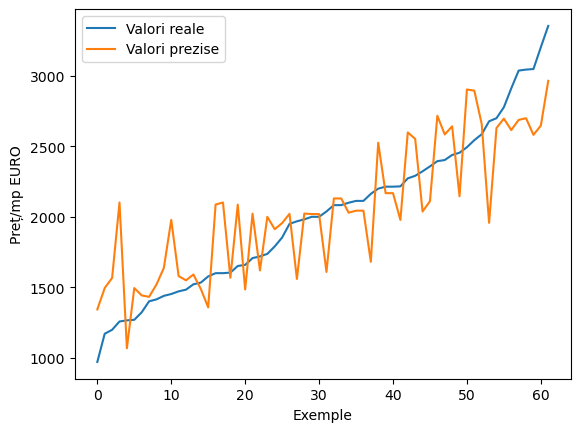

In [23]:
# import matplotlib.pyplot as plt


# results_df = pd.DataFrame({'Y_test': y_test, 'Y_pred': y_pred})

# # Sortează valorile în ordine crescătoare pentru a le putea trasa graficul
# results_df.sort_values(by=['Y_test'], inplace=True)

# # Resetăm indexul pentru a ne asigura că valorile se potrivesc între cele două coloane
# results_df = results_df.reset_index(drop=True)

# print("Price per unit")

# plt.plot(results_df['Y_test'], label='Valori reale')
# plt.plot(results_df['Y_pred'], label='Valori prezise')
# plt.xlabel('Exemple')
# plt.ylabel('Preț/mp')
# plt.legend()
# plt.show()
import matplotlib.pyplot as plt
import os

results_df = pd.DataFrame({'Y_test': y_test, 'Y_pred': y_pred})

# Sortăm valorile în ordine crescătoare pentru a le putea trasa graficul
results_df.sort_values(by=['Y_test'], inplace=True)

# Resetăm indexul pentru a ne asigura că valorile se potrivesc între cele două coloane
results_df = results_df.reset_index(drop=True)

print("Price per unit (in Euro)")

plt.plot(results_df['Y_test'], label='Valori reale')
plt.plot(results_df['Y_pred'], label='Valori prezise')
plt.xlabel('Exemple')
plt.ylabel('Preț/mp EURO')
plt.legend()
director = 'C:\\Users\\Larisa\\Desktop\\licenta\\price-prediction\\src\\assets'

# Numele fișierului
nume_fisier = 'grafic.png'

# Construirea calei absolute
ruta_absoluta = os.path.abspath(os.path.join(director, nume_fisier))

# Salvare grafic la ruta absolută specificată
plt.savefig(ruta_absoluta)
plt.show()





Price (in Euro)


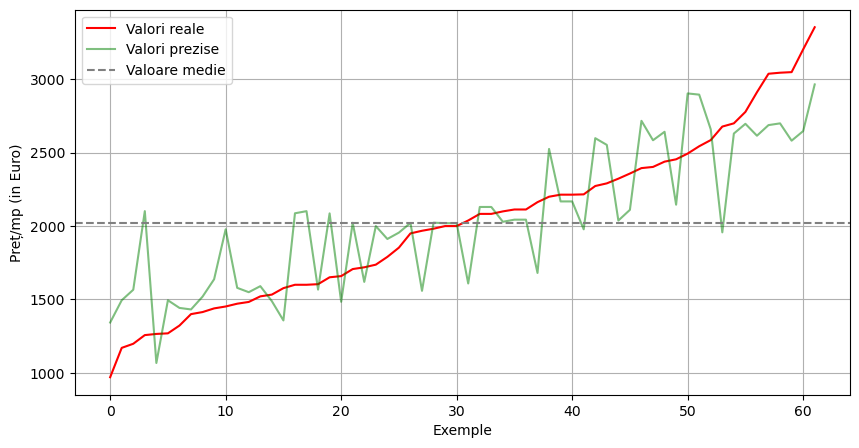

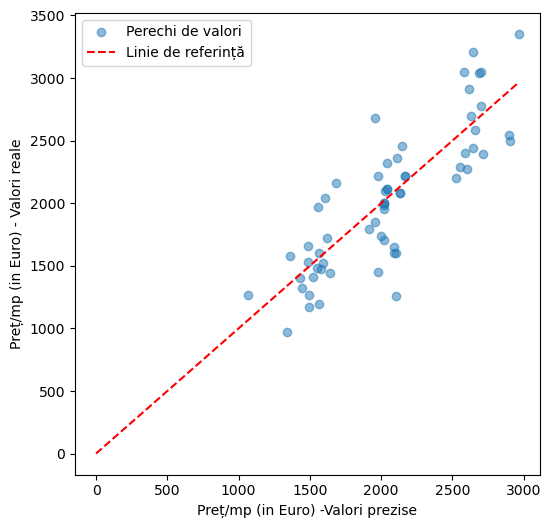

In [24]:
import matplotlib.pyplot as plt

results_df_price = pd.DataFrame({'Y_test': y_test, 'Y_pred': y_pred})

# Sortează valorile în ordine crescătoare pentru a le putea trasa graficul
results_df_price.sort_values(by=['Y_test'], inplace=True)

# Resetăm indexul pentru a ne asigura că valorile se potrivesc între cele două coloane
results_df_price = results_df_price.reset_index(drop=True)

print("Price (in Euro)")

plt.figure(figsize=(10, 5))
plt.plot(results_df_price['Y_test'], label='Valori reale', color='red')
plt.plot(results_df_price['Y_pred'], label='Valori prezise', alpha=0.5, color='green')
plt.axhline(y=results_df_price['Y_test'].mean(), color='gray', linestyle='--', label='Valoare medie')
plt.xlabel('Exemple')
plt.ylabel('Preț/mp (in Euro)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(results_df_price['Y_pred'], results_df_price['Y_test'], alpha=0.5, label='Perechi de valori')
plt.plot([0, max(y_pred)], [0, max(y_pred)], '--', color='red', label='Linie de referință')
plt.xlabel('Preț/mp (in Euro) -Valori prezise')
plt.ylabel('Preț/mp (in Euro) - Valori reale')
plt.legend()
plt.show()


Price (in Euro)


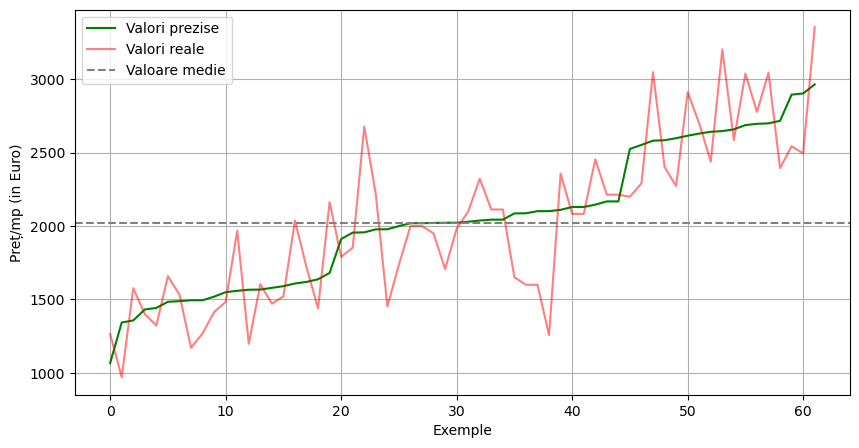

In [25]:
import matplotlib.pyplot as plt

results_df_price = pd.DataFrame({'Y_test': y_test, 'Y_pred': y_pred})

# Sortează valorile în ordine crescătoare pentru a le putea trasa graficul
results_df_price.sort_values(by=['Y_pred'], inplace=True)

# Resetăm indexul pentru a ne asigura că valorile se potrivesc între cele două coloane
results_df_price = results_df_price.reset_index(drop=True)

print("Price (in Euro)")

plt.figure(figsize=(10, 5))
plt.plot(results_df_price['Y_pred'], label='Valori prezise', color='green')
plt.plot(results_df_price['Y_test'], label='Valori reale', alpha=0.5, color='red')
plt.axhline(y=results_df_price['Y_test'].mean(), color='gray', linestyle='--', label='Valoare medie')
plt.xlabel('Exemple ordonate crescator')
plt.ylabel('Preț/mp (in Euro)')
plt.legend()
plt.grid(True)
plt.show()